# Tema 2 IA - ML Aplicat
### Alexandru LICURICEANU - 332CD

In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score


%matplotlib inline

CREDIT_RISK_TEST_PATH = './tema2_Credit_Risk/credit_risk_test.csv'
CREDIT_RISK_TRAIN_PATH = './tema2_Credit_Risk/credit_risk_train.csv'
CREDIT_RISK_FULL_PATH = './tema2_Credit_Risk/credit_risk_full.csv'

SALARY_PREDICTION_TEST_PATH = './tema2_SalaryPrediction/SalaryPrediction_test.csv'
SALARY_PREDICTION_TRAIN_PATH = './tema2_SalaryPrediction/SalaryPrediction_train.csv'
SALARY_PREDICTION_FULL_PATH = './tema2_SalaryPrediction/SalaryPrediction_full.csv'

pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 1. Analiza tipului de atribute si a plajei de valori a acestora.

### 1.1. Dataset-ul "credit_risk_full".

Numarul de atribute numerice continue care nu au valori lipsa:

In [434]:
cr_df = pd.read_csv(CREDIT_RISK_FULL_PATH)
cr_df.count(numeric_only=True)

loan_rate                        9060
loan_amount                     10000
job_tenure_years                 9736
credit_history_length_years     10000
applicant_age                   10000
applicant_income                10000
loan_income_ratio               10000
credit_history_length_months    10000
dtype: int64

Valorea medie, deviatia standard a valorilor, valoarea minima, valoarea percentilelor 25%, 50%, 75%, valoarea maxima:

In [435]:
cr_df.describe()

,loan_rate,loan_amount,job_tenure_years,credit_history_length_years,applicant_age,applicant_income,loan_income_ratio,credit_history_length_months
count,9060.000,10000.000,9736.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,11.007,9568.038,4.786,5.811,27.745,65734.211,0.170,75.761
std,3.266,6350.432,4.353,4.050,6.360,56944.387,0.107,48.677
min,5.420,500.000,0.000,2.000,20.000,4200.000,0.000,25.000
25%,7.900,5000.000,2.000,3.000,23.000,38595.000,0.090,41.000
50%,10.990,8000.000,4.000,4.000,26.000,55000.000,0.150,57.000
75%,13.470,12200.000,7.000,8.000,30.000,78997.000,0.230,102.000
max,23.220,35000.000,123.000,30.000,123.000,2039784.000,0.760,369.000


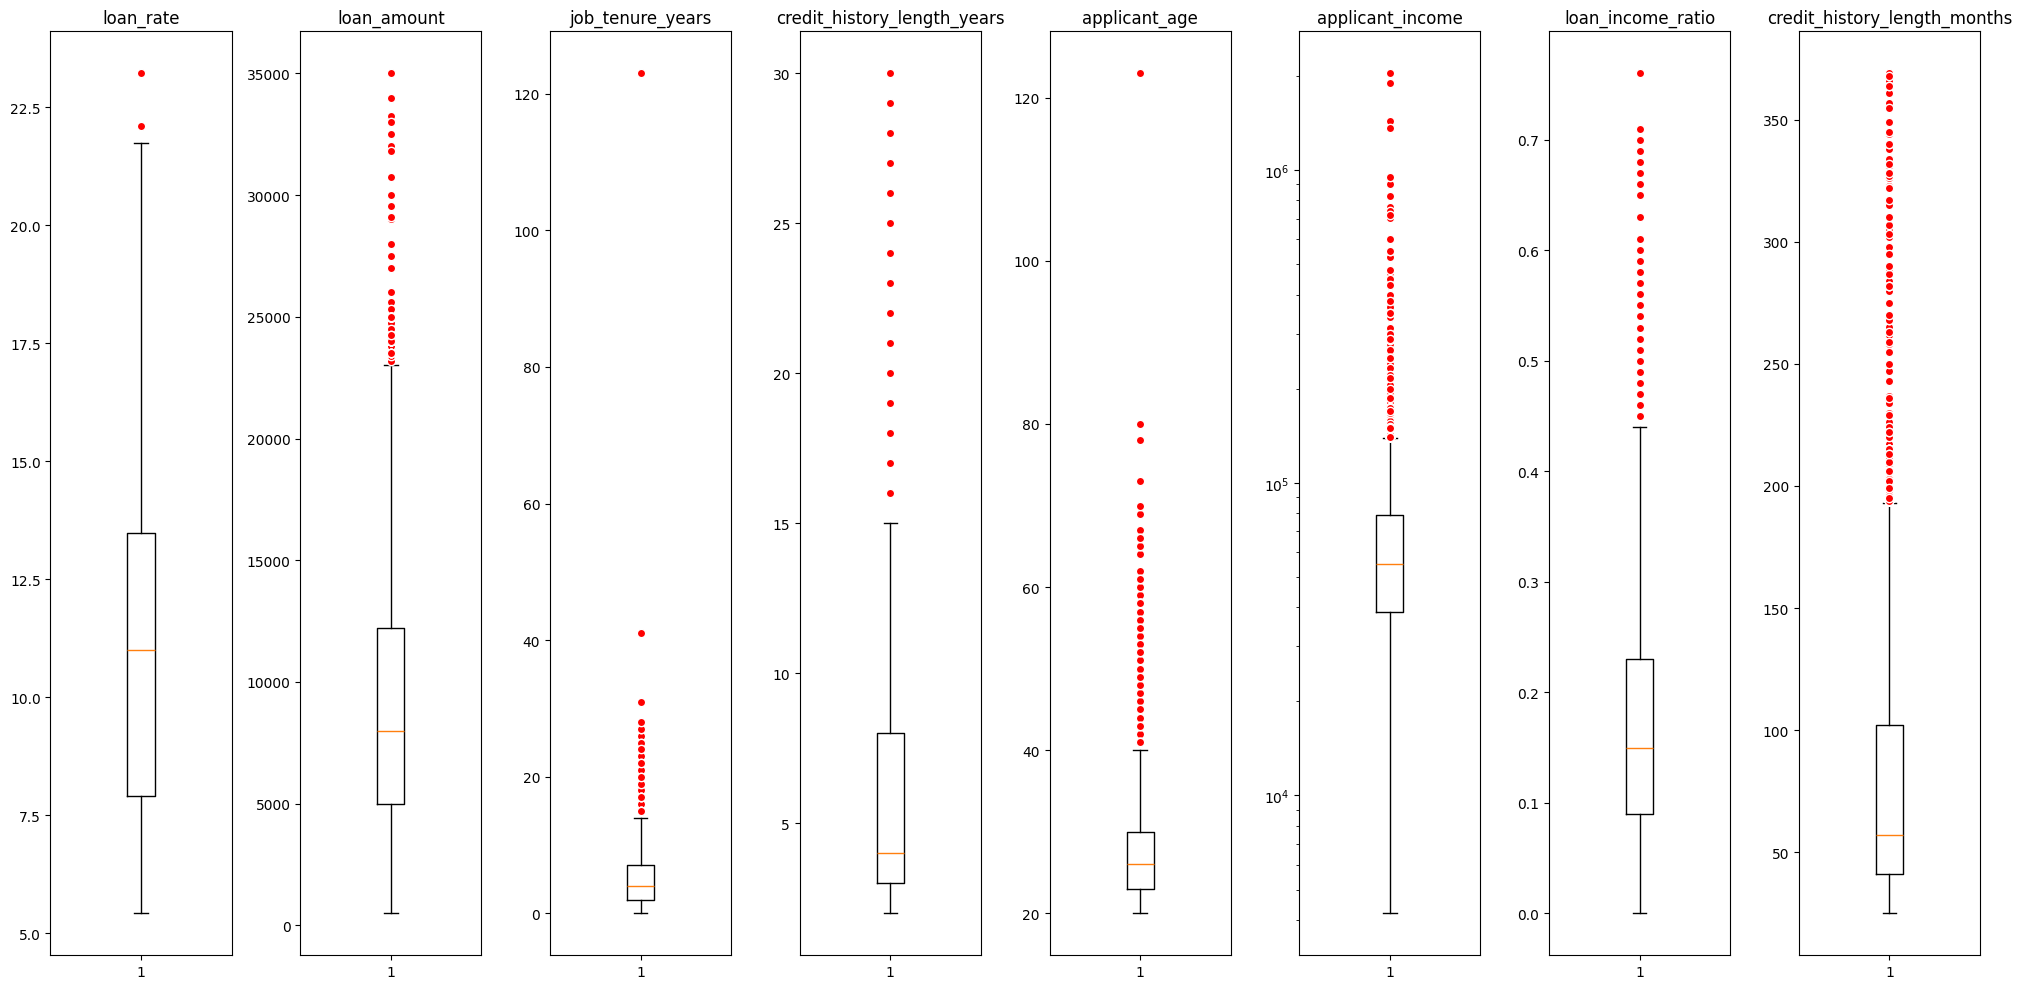

In [436]:
numeric_columns = cr_df.describe().columns

circle = dict(markerfacecolor='r', marker='o', markeredgecolor='w')
fig, axs = plt.subplots(1, len(numeric_columns), figsize=(20, 10))

for i, column in enumerate(numeric_columns):

    ax = axs[i]
    ax.boxplot(cr_df[column].dropna(), flierprops=circle)
    ax.set_title(column)

    if column == 'applicant_income':
        ax.semilogy()

plt.tight_layout()

Numarul de atribute discrete care nu au valori lipsa:

In [437]:
cr_df.select_dtypes(exclude=['number']).notnull().sum()

residential_status               10000
loan_purpose                     10000
loan_approval_status             10000
loan_rating                      10000
credit_history_default_status    10000
stability_rating                 10000
dtype: int64

Numarul de valori unice:

In [438]:
cr_df.select_dtypes(exclude=['number']).nunique()

residential_status               4
loan_purpose                     6
loan_approval_status             2
loan_rating                      7
credit_history_default_status    2
stability_rating                 4
dtype: int64

Distributia atributelor discrete:

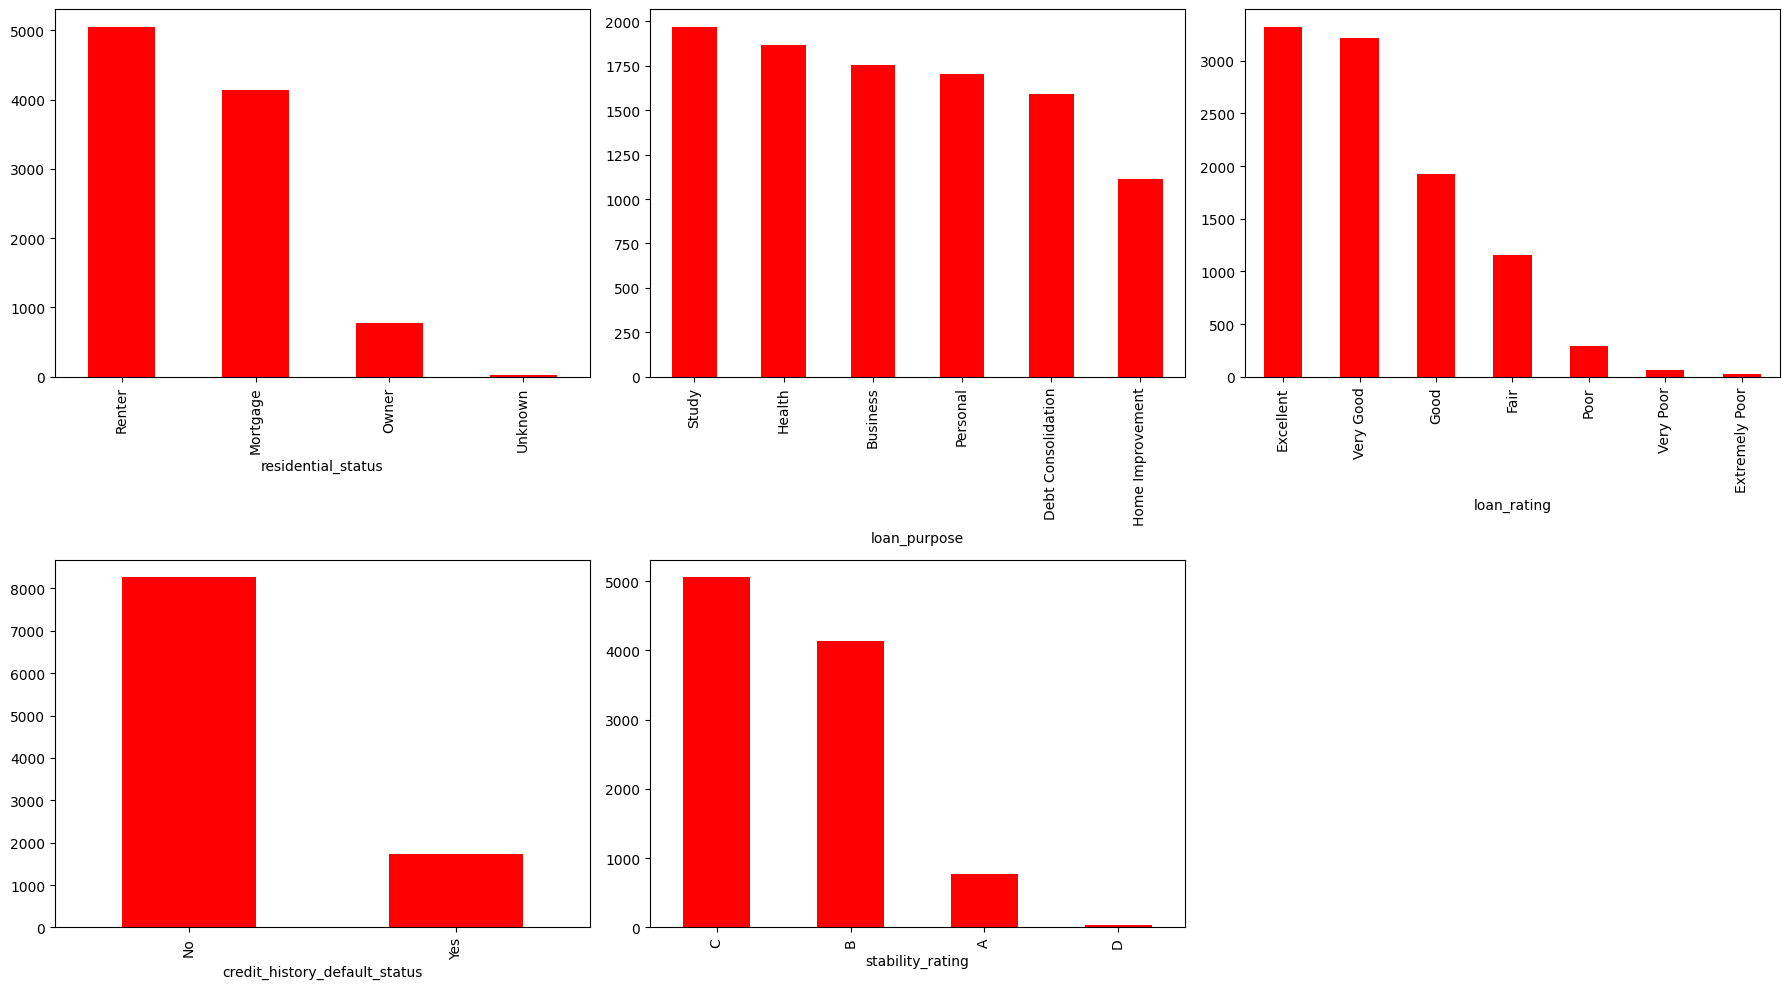

In [439]:
non_numeric_columns = cr_df.select_dtypes(exclude=['number']).notnull().columns
non_numeric_columns = non_numeric_columns[non_numeric_columns != 'loan_approval_status']

nr_rows = 2
nr_columns = (len(non_numeric_columns) + nr_rows - 1) // nr_rows

fig, axs = plt.subplots(nr_rows, nr_columns, figsize=(18, 10))
axs = axs.flatten()

for i, column in enumerate(non_numeric_columns):
    ax = axs[i]
    cr_df[column].value_counts().plot(kind='bar', ax=ax, color='r')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()

### 1.2. Dataset-ul "SalaryPrediction_full":

Numarul de atribute numerice continue care nu au valori lipsa:

In [440]:
sp_df = pd.read_csv(SALARY_PREDICTION_FULL_PATH, na_values=['?'])
sp_df.count(numeric_only=True)

fnl        9999
hpw        9199
gain       9999
edu_int    9999
years      9999
loss       9999
prod       9999
dtype: int64

Valorea medie, deviatia standard a valorilor, valoarea minima, valoarea percentilelor 25%, 50%, 75%, valoarea maxima:

In [441]:
sp_df.describe()

,fnl,hpw,gain,edu_int,years,loss,prod
count,9999.000,9199.000,9999.000,9999.000,9999.000,9999.000,9999.000
mean,190352.902,40.416,979.853,14.262,38.647,84.111,2014.928
std,106070.863,12.517,7003.795,24.771,13.745,394.035,14007.604
min,19214.000,1.000,0.000,1.000,17.000,0.000,-28.000
25%,118282.500,40.000,0.000,9.000,28.000,0.000,42.000
50%,178472.000,40.000,0.000,10.000,37.000,0.000,57.000
75%,237311.000,45.000,0.000,13.000,48.000,0.000,77.000
max,1455435.000,99.000,99999.000,206.000,90.000,3770.000,200125.000


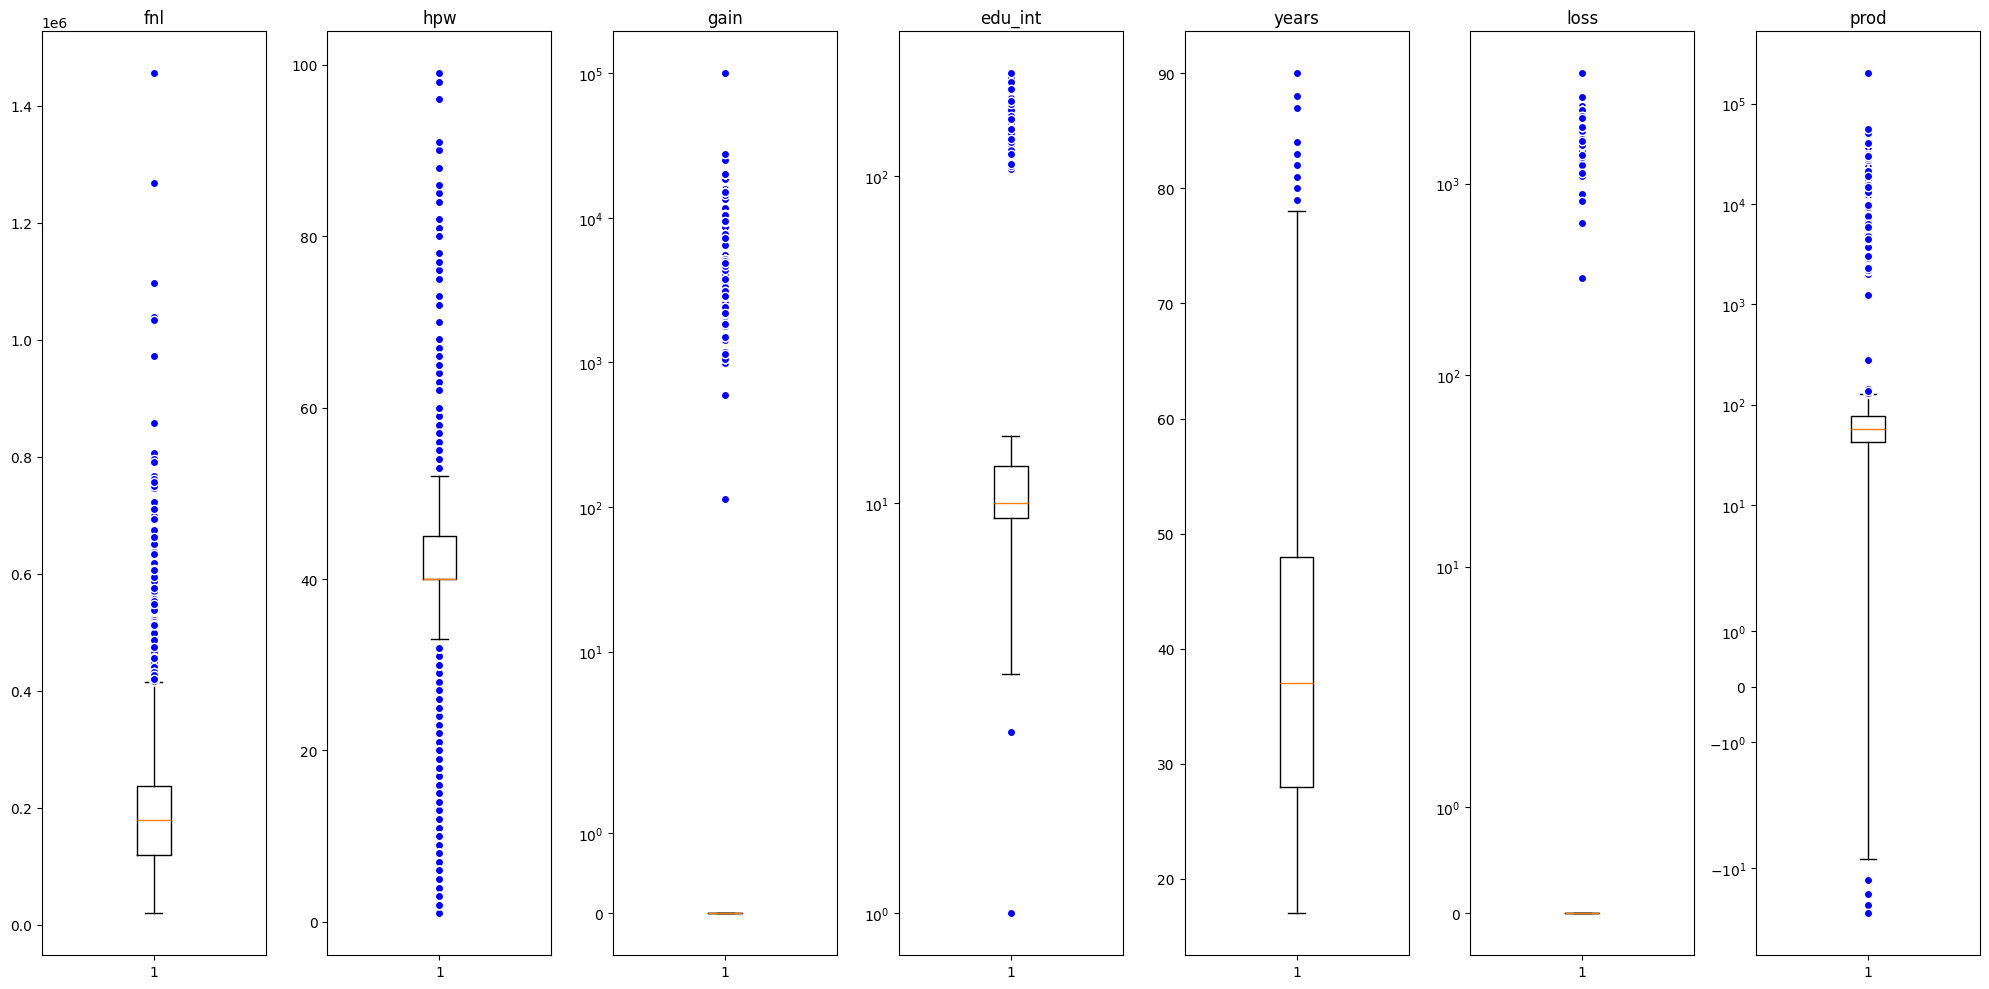

In [442]:
numeric_columns = sp_df.describe().columns

circle = dict(markerfacecolor='b', marker='o', markeredgecolor='w')
fig, axs = plt.subplots(1, len(numeric_columns), figsize=(20, 10))

for i, column in enumerate(numeric_columns):

    ax = axs[i]
    ax.boxplot(sp_df[column].dropna(), flierprops=circle)
    ax.set_title(column)

    if column == 'edu_int' or column == 'prod':
        ax.set_yscale('symlog')

    if column == 'gain' or column == 'loss':
        ax.set_yscale('symlog')

plt.tight_layout()


Numarul de atribute discrete care nu au valori lipsa:

In [443]:
sp_df.select_dtypes(exclude=['number']).notnull().sum()

relation     9999
country      9841
job          9417
work_type    9419
partner      9999
edu          9999
gender       9199
race         9999
gtype        9999
money        9999
dtype: int64

Numarul de valori unice:

In [444]:
sp_df.select_dtypes(exclude=['number']).nunique()

relation      6
country      40
job          13
work_type     8
partner       7
edu          16
gender        2
race          5
gtype         2
money         2
dtype: int64

Distributiile atributelor discrete:

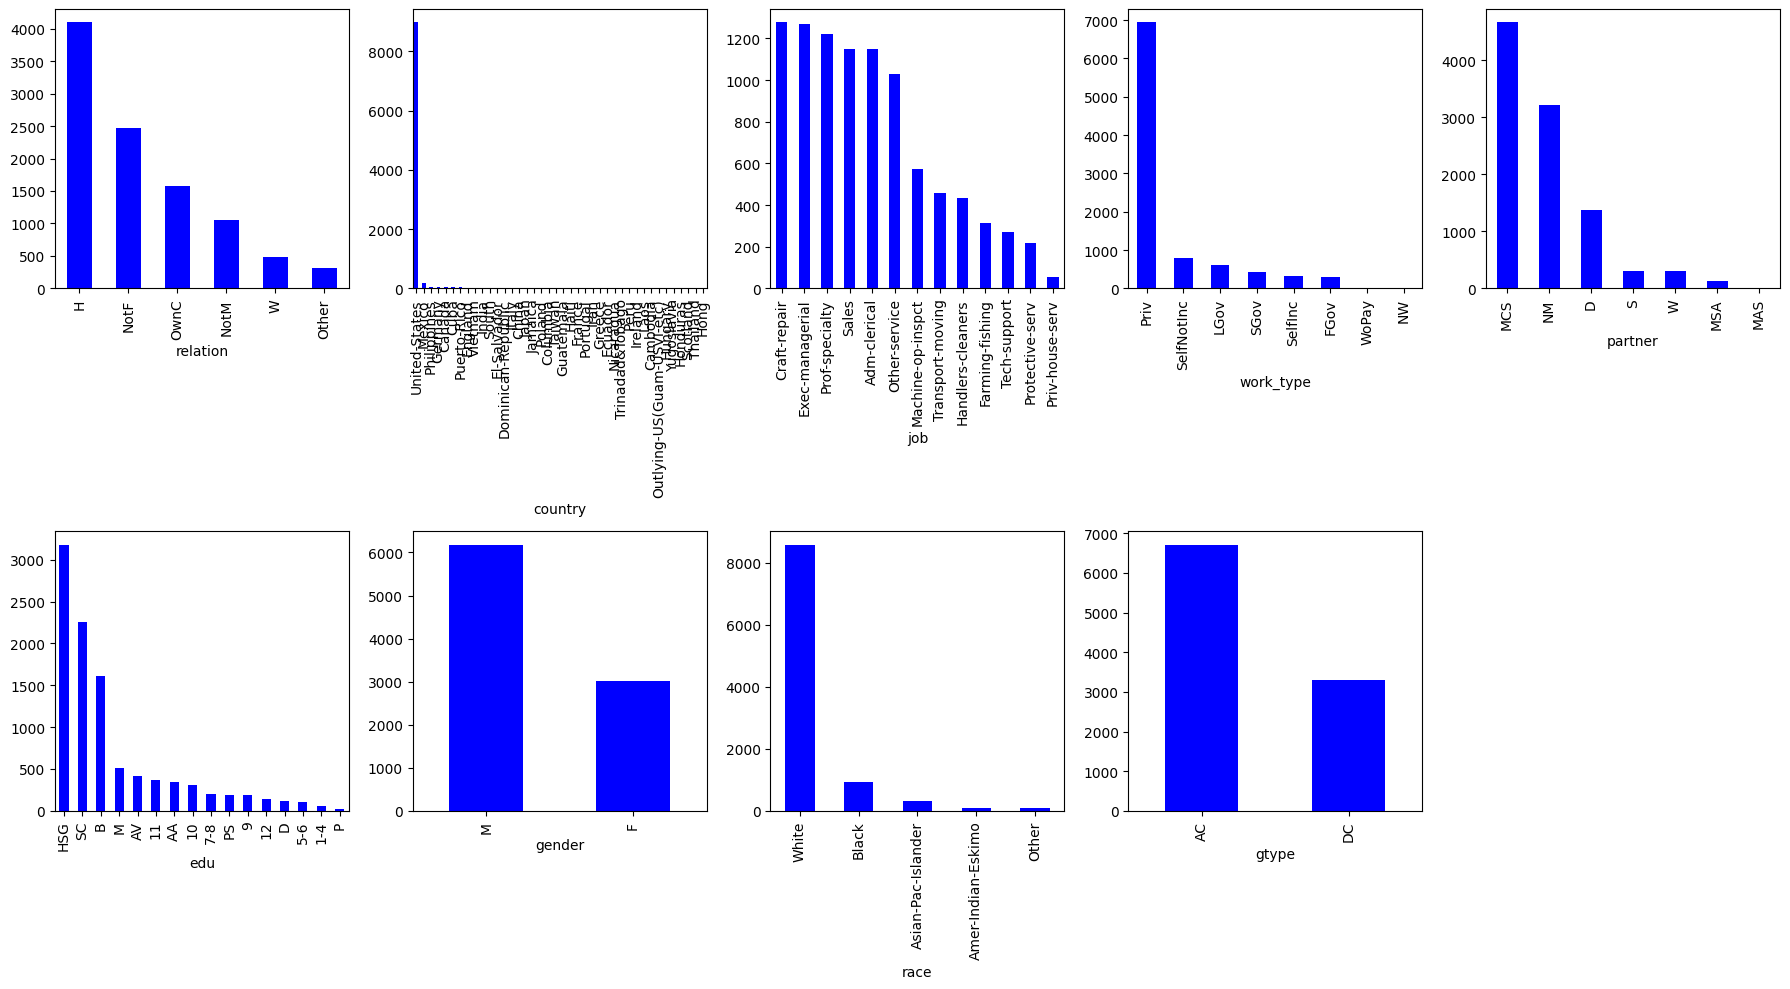

In [445]:
non_numeric_columns = sp_df.select_dtypes(exclude=['number']).notnull().columns
non_numeric_columns = non_numeric_columns[non_numeric_columns != 'money']

nr_rows = 2
nr_columns = (len(non_numeric_columns) + nr_rows - 1) // nr_rows

fig, axs = plt.subplots(nr_rows, nr_columns, figsize=(18, 10))
axs = axs.flatten()

for i, column in enumerate(non_numeric_columns):
    ax = axs[i]
    sp_df[column].value_counts().plot(kind='bar', ax=ax, color='b')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()


# 2. Analiza echilibrului de clase

### 2.1. Dataset-ul "credit_risk"

Pentru setul de date de antrenare:

<Axes: xlabel='loan_approval_status'>

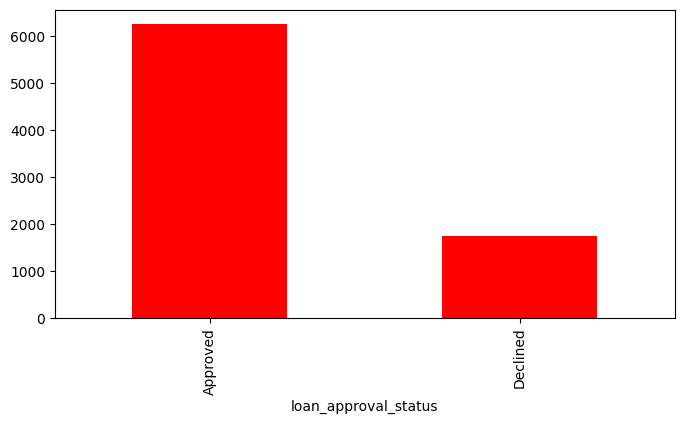

In [446]:
cr_train_df = pd.read_csv(CREDIT_RISK_TRAIN_PATH)
cr_train_df['loan_approval_status'].value_counts().plot(kind='bar', figsize=(8, 4), color='r')

Pentru setul de date de test:

<Axes: xlabel='loan_approval_status'>

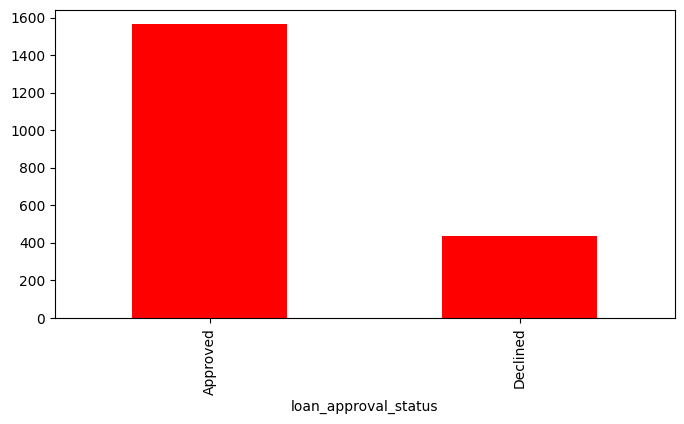

In [447]:
cr_test_df = pd.read_csv(CREDIT_RISK_TEST_PATH)
cr_test_df['loan_approval_status'].value_counts().plot(kind='bar', figsize=(8, 4), color='r')

### 2.2. Dataset-ul "SalaryPrediction"

Pentru setul de date de antrenare:

<Axes: xlabel='money'>

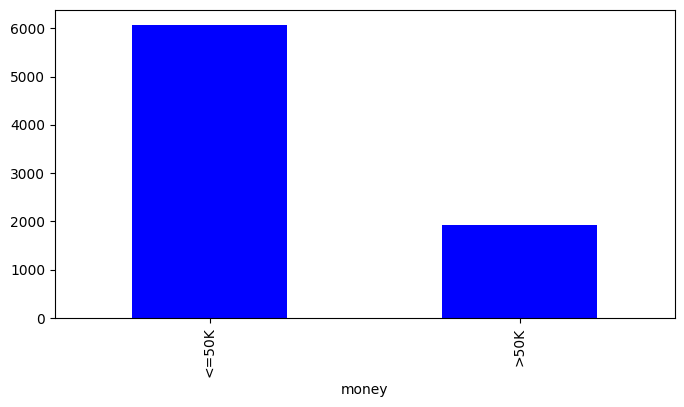

In [448]:
sp_train_df = pd.read_csv(SALARY_PREDICTION_TRAIN_PATH, na_values=['?'])
sp_train_df['money'].value_counts().plot(kind='bar', figsize=(8, 4), color='b')

Pentru setul de date de test:

<Axes: xlabel='money'>

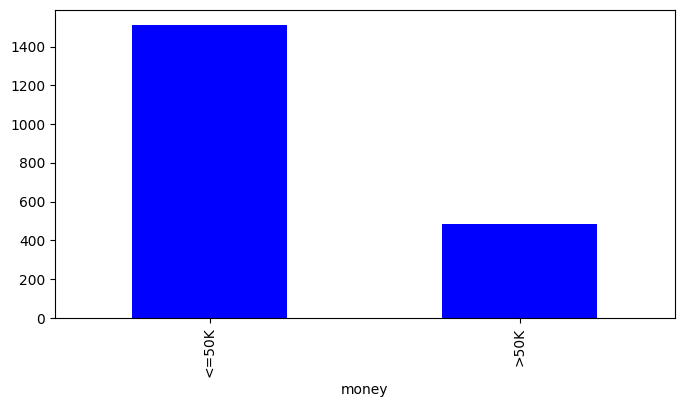

In [449]:
sp_test_df = pd.read_csv(SALARY_PREDICTION_TEST_PATH, na_values=['?'])
sp_test_df['money'].value_counts().plot(kind='bar', figsize=(8, 4), color='b')

# 3. Analiza corelatiei intre atribute

### 3.1. Dataset-ul "credit_risk"

Pentru atributele numerice:

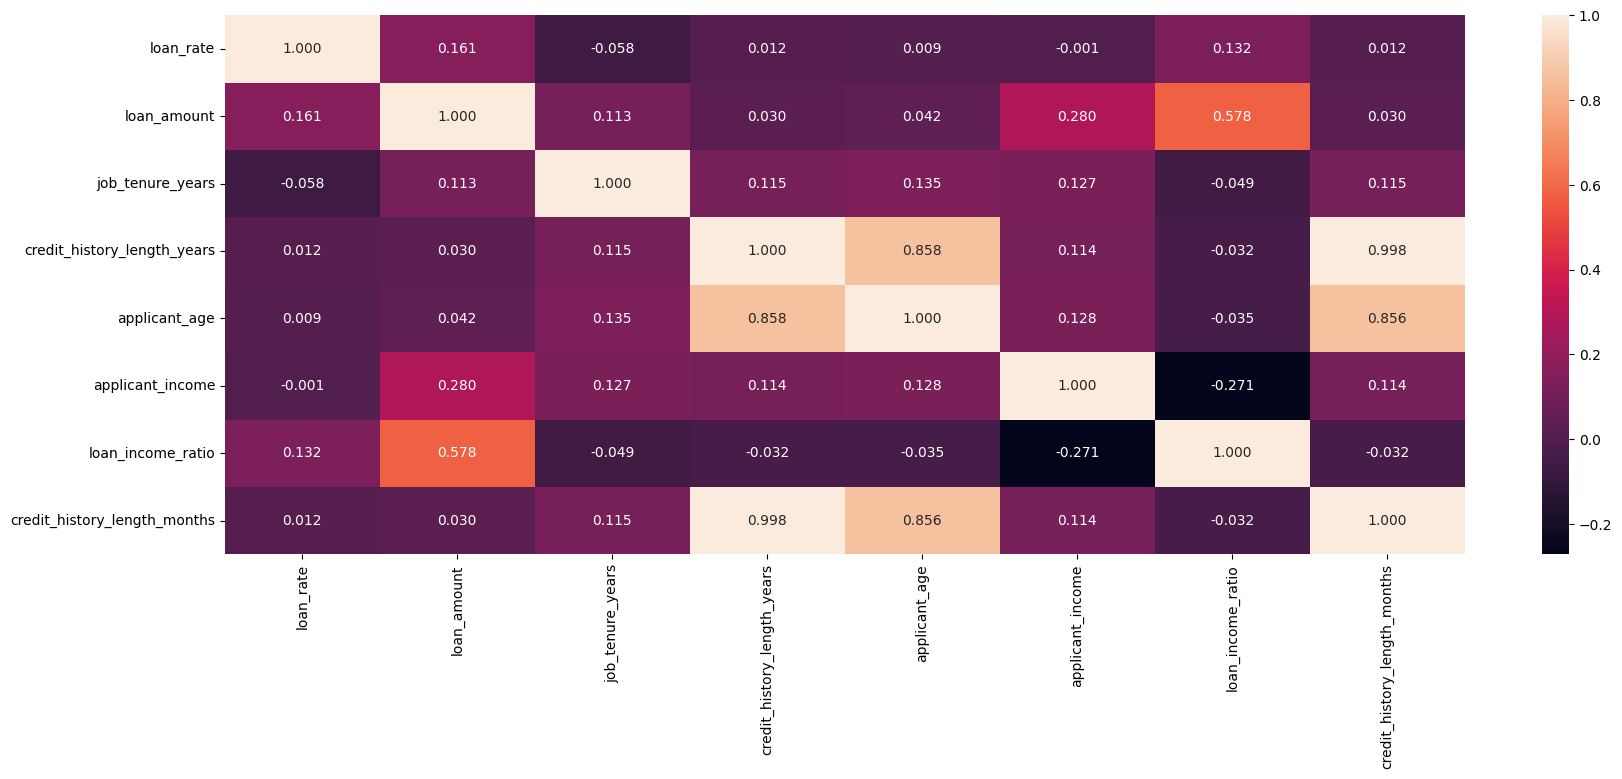

In [450]:
sns.heatmap(data=cr_df.select_dtypes(include=['number']).corr(method='pearson'), annot=True, fmt='.3f')
plt.rcParams['figure.figsize'] = [20, 7]

Pentru atributele categorice:

<Axes: >

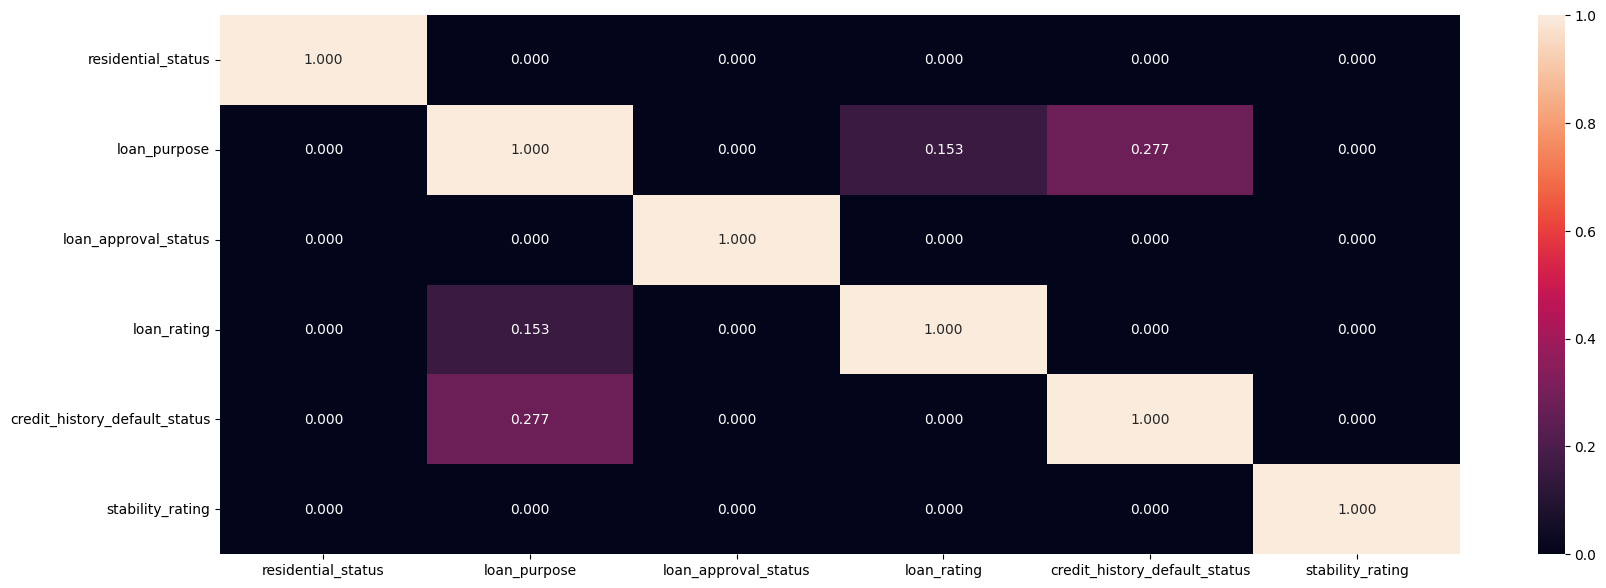

In [451]:
categorical_columns = cr_df.select_dtypes(exclude=['number']).columns

p_value_matrix = pd.DataFrame(np.ones((len(categorical_columns), len(categorical_columns))),
                              index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:

            contingency_table = pd.crosstab(cr_df[col1], cr_df[col2])
            chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

            p_value_matrix.loc[col1, col2] = p_value
            p_value_matrix.loc[col2, col1] = p_value

plt.figure(figsize=(20, 7))
sns.heatmap(p_value_matrix, annot=True, fmt='.3f')

### 3.2. Dataset-ul "SalaryPrediction"

Pentru atributele numerice:

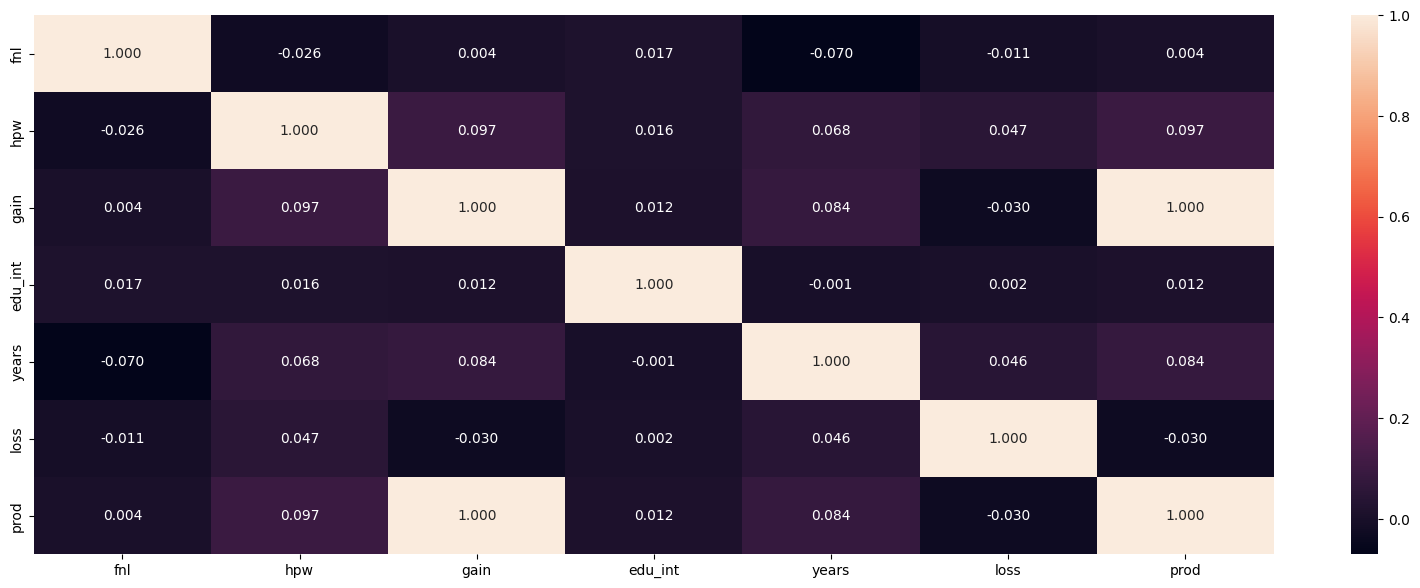

In [452]:
sns.heatmap(data=sp_df.select_dtypes(include=['number']).corr(method='pearson'), annot=True, fmt='.3f')
plt.rcParams['figure.figsize'] = [20, 7]

Pentru atributele categorice:

<Axes: >

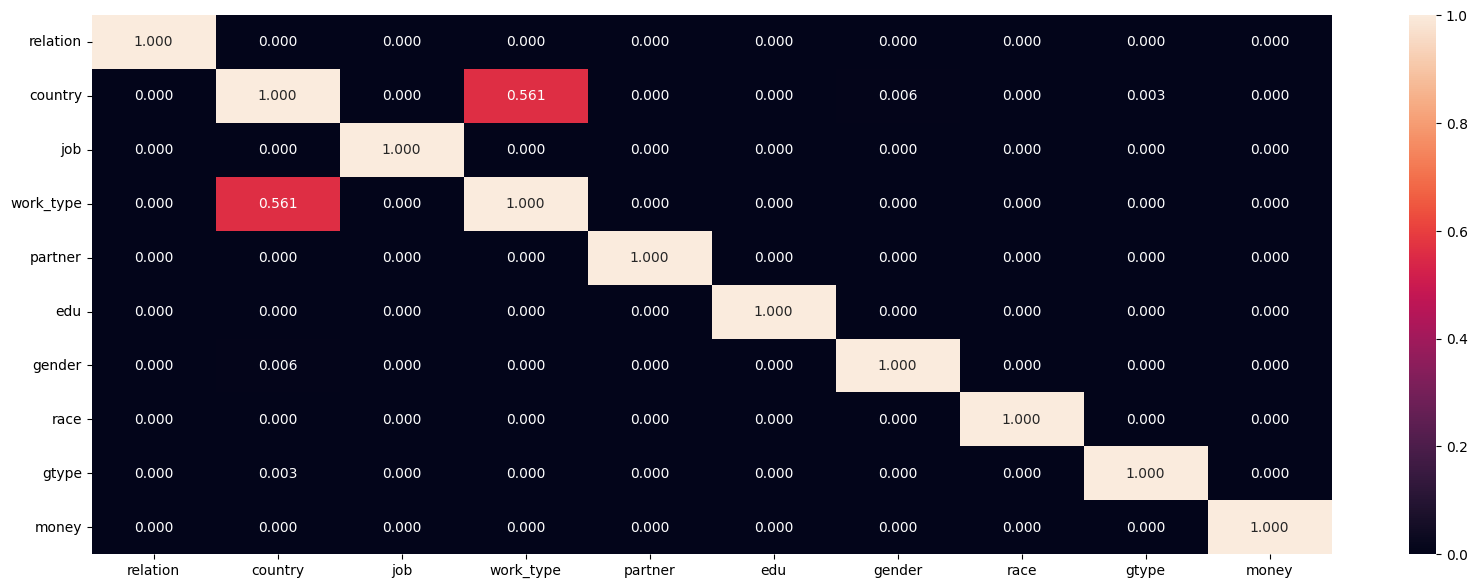

In [453]:
categorical_columns = sp_df.select_dtypes(exclude=['number']).columns

p_value_matrix = pd.DataFrame(np.ones((len(categorical_columns), len(categorical_columns))),
                              index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:

            contingency_table = pd.crosstab(sp_df[col1], sp_df[col2])
            chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

            p_value_matrix.loc[col1, col2] = p_value
            p_value_matrix.loc[col2, col1] = p_value

plt.figure(figsize=(20, 7))
sns.heatmap(p_value_matrix, annot=True, fmt='.3f')


# 4. Preprocesarea datelor

In [454]:
def imput_numerical_data(df, imputer):
    numerical_columns = df.select_dtypes(include=['number']).columns

    df_imputed = df.copy()
    df_imputed[numerical_columns] = imputer.fit_transform(df[numerical_columns])

    return df_imputed


def imput_categorical_data(df, imputer):
    categorical_columns = df.select_dtypes(exclude=['number']).columns

    df_imputed = df.copy()
    df_imputed[categorical_columns] = imputer.fit_transform(df[categorical_columns])

    return df_imputed


def replace_outliers_iqr(df, imputer, threshold=1.5):
    numerical_columns = df.select_dtypes(include=['number']).columns

    for column in numerical_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        outliers = (df[column] < q1 - threshold * iqr) | (df[column] > q3 + threshold * iqr)
        df.loc[outliers, column] = np.nan
    
    imputed_values = imputer.fit_transform(df[numerical_columns])
    df[numerical_columns] = imputed_values

    return df


def scale_numerical_data(df, scaler):
    numerical_columns = df.select_dtypes(include=['number']).columns
    scaler = scaler.fit(df[numerical_columns])
    scaled_values = scaler.transform(df[numerical_columns])

    scaled_df = df.copy()
    scaled_df[numerical_columns] = pd.DataFrame(scaled_values, columns=numerical_columns)

    return scaled_df


### 4.1. Dataset-ul "credit_risk"

Imputarea datelor lipsa:

In [455]:
# Imput missing numerical data.
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
cr_train_df = imput_numerical_data(cr_train_df, mean_imputer)
cr_test_df = imput_numerical_data(cr_test_df, mean_imputer)

# Imput missing categorical data.
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
cr_train_df = imput_categorical_data(cr_train_df, most_frequent_imputer)
cr_test_df = imput_categorical_data(cr_test_df, most_frequent_imputer)


Inlocuirea valorilor extreme:

In [456]:
# Replace outliers.
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
cr_train_df = replace_outliers_iqr(cr_train_df, iterative_imputer)
cr_test_df = replace_outliers_iqr(cr_test_df, iterative_imputer)

Standardizarea valorilor atributelor numerice:

In [457]:
standard_scaler = preprocessing.StandardScaler()
cr_train_df = scale_numerical_data(cr_train_df, standard_scaler)
cr_test_df = scale_numerical_data(cr_test_df, standard_scaler)

Vizualizarea rezultatelor:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   residential_status             10000 non-null  object 
 1   loan_rate                      10000 non-null  float64
 2   loan_amount                    10000 non-null  float64
 3   loan_purpose                   10000 non-null  object 
 4   job_tenure_years               10000 non-null  float64
 5   credit_history_length_years    10000 non-null  float64
 6   applicant_age                  10000 non-null  float64
 7   applicant_income               10000 non-null  float64
 8   loan_rating                    10000 non-null  object 
 9   credit_history_default_status  10000 non-null  object 
 10  loan_income_ratio              10000 non-null  float64
 11  stability_rating               10000 non-null  object 
 12  credit_history_length_months   10000 non-null  

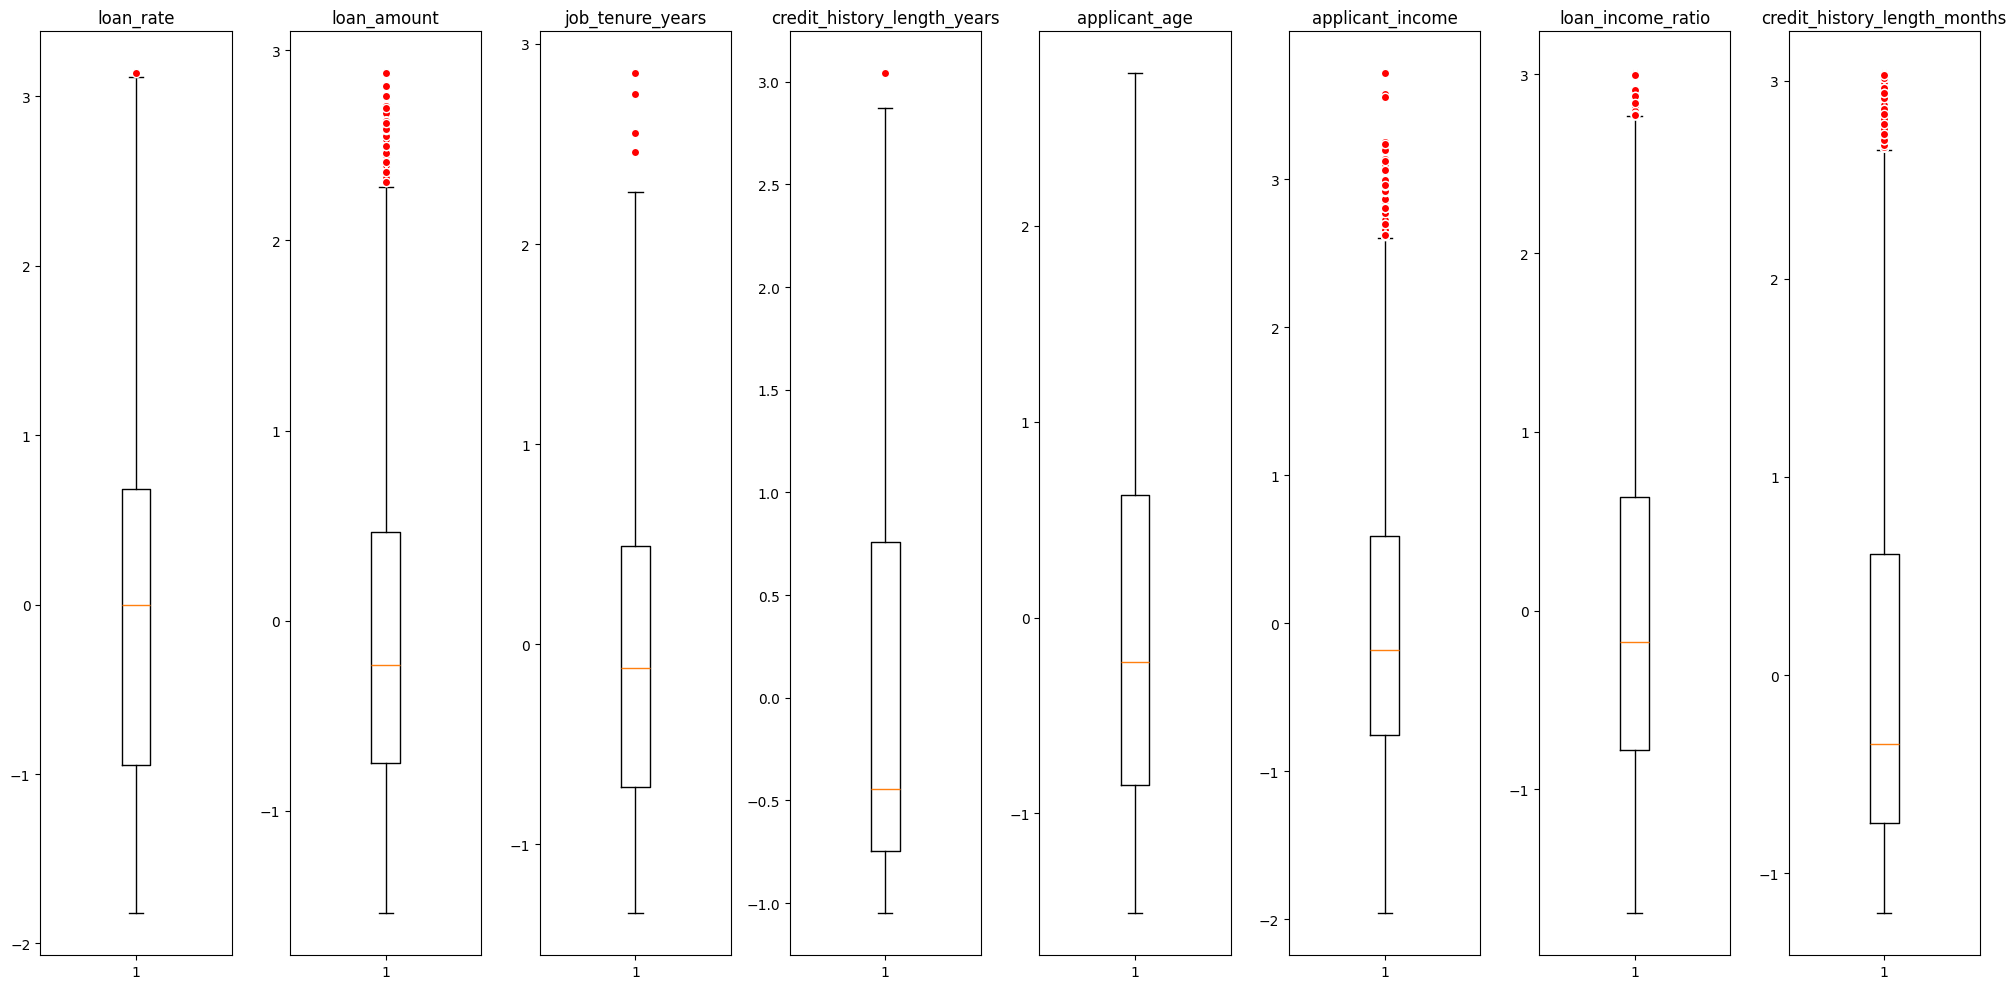

In [458]:
def print_numeric_boxplots(df, marker, semilogy=[]):
    numerical_columns = df.describe().columns

    fig, axs = plt.subplots(1, len(numerical_columns), figsize=(20, 10))

    for i, column in enumerate(numerical_columns):
        ax = axs[i]
        ax.boxplot(df[column].dropna(), flierprops=marker)
        ax.set_title(column)

        if column in semilogy:
            ax.semilogy()

    plt.tight_layout()


cr_df = pd.concat([cr_train_df, cr_test_df], axis=0, ignore_index=True)
cr_df.info()

circle = dict(markerfacecolor='r', marker='o', markeredgecolor='w')
print_numeric_boxplots(cr_df, circle)

### 4.2. Dataset-ul "SalaryPrediction"

Imputarea datelor lipsa:

In [459]:
# Imput missing numerical data.
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
sp_train_df = imput_numerical_data(sp_train_df, mean_imputer)
sp_test_df = imput_numerical_data(sp_test_df, mean_imputer)

# Imput missing categorical data.
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
sp_train_df = imput_categorical_data(sp_train_df, most_frequent_imputer)
sp_test_df = imput_categorical_data(sp_test_df, most_frequent_imputer)

Inlocuirea valorilor extreme:

In [460]:
# Replace outliers.
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)
sp_train_df = replace_outliers_iqr(sp_train_df, iterative_imputer)
sp_test_df = replace_outliers_iqr(sp_test_df, iterative_imputer)

Standardizarea valorilor atributelor numerice:

In [461]:
standard_scaler = preprocessing.StandardScaler()
sp_train_df = scale_numerical_data(sp_train_df, standard_scaler)
sp_test_df = scale_numerical_data(sp_test_df, standard_scaler)

Vizualizarea rezultatelor:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fnl        9999 non-null   float64
 1   hpw        9999 non-null   float64
 2   relation   9999 non-null   object 
 3   gain       9999 non-null   float64
 4   country    9999 non-null   object 
 5   job        9999 non-null   object 
 6   edu_int    9999 non-null   float64
 7   years      9999 non-null   float64
 8   loss       9999 non-null   float64
 9   work_type  9999 non-null   object 
 10  partner    9999 non-null   object 
 11  edu        9999 non-null   object 
 12  gender     9999 non-null   object 
 13  race       9999 non-null   object 
 14  prod       9999 non-null   float64
 15  gtype      9999 non-null   object 
 16  money      9999 non-null   object 
dtypes: float64(7), object(10)
memory usage: 1.3+ MB


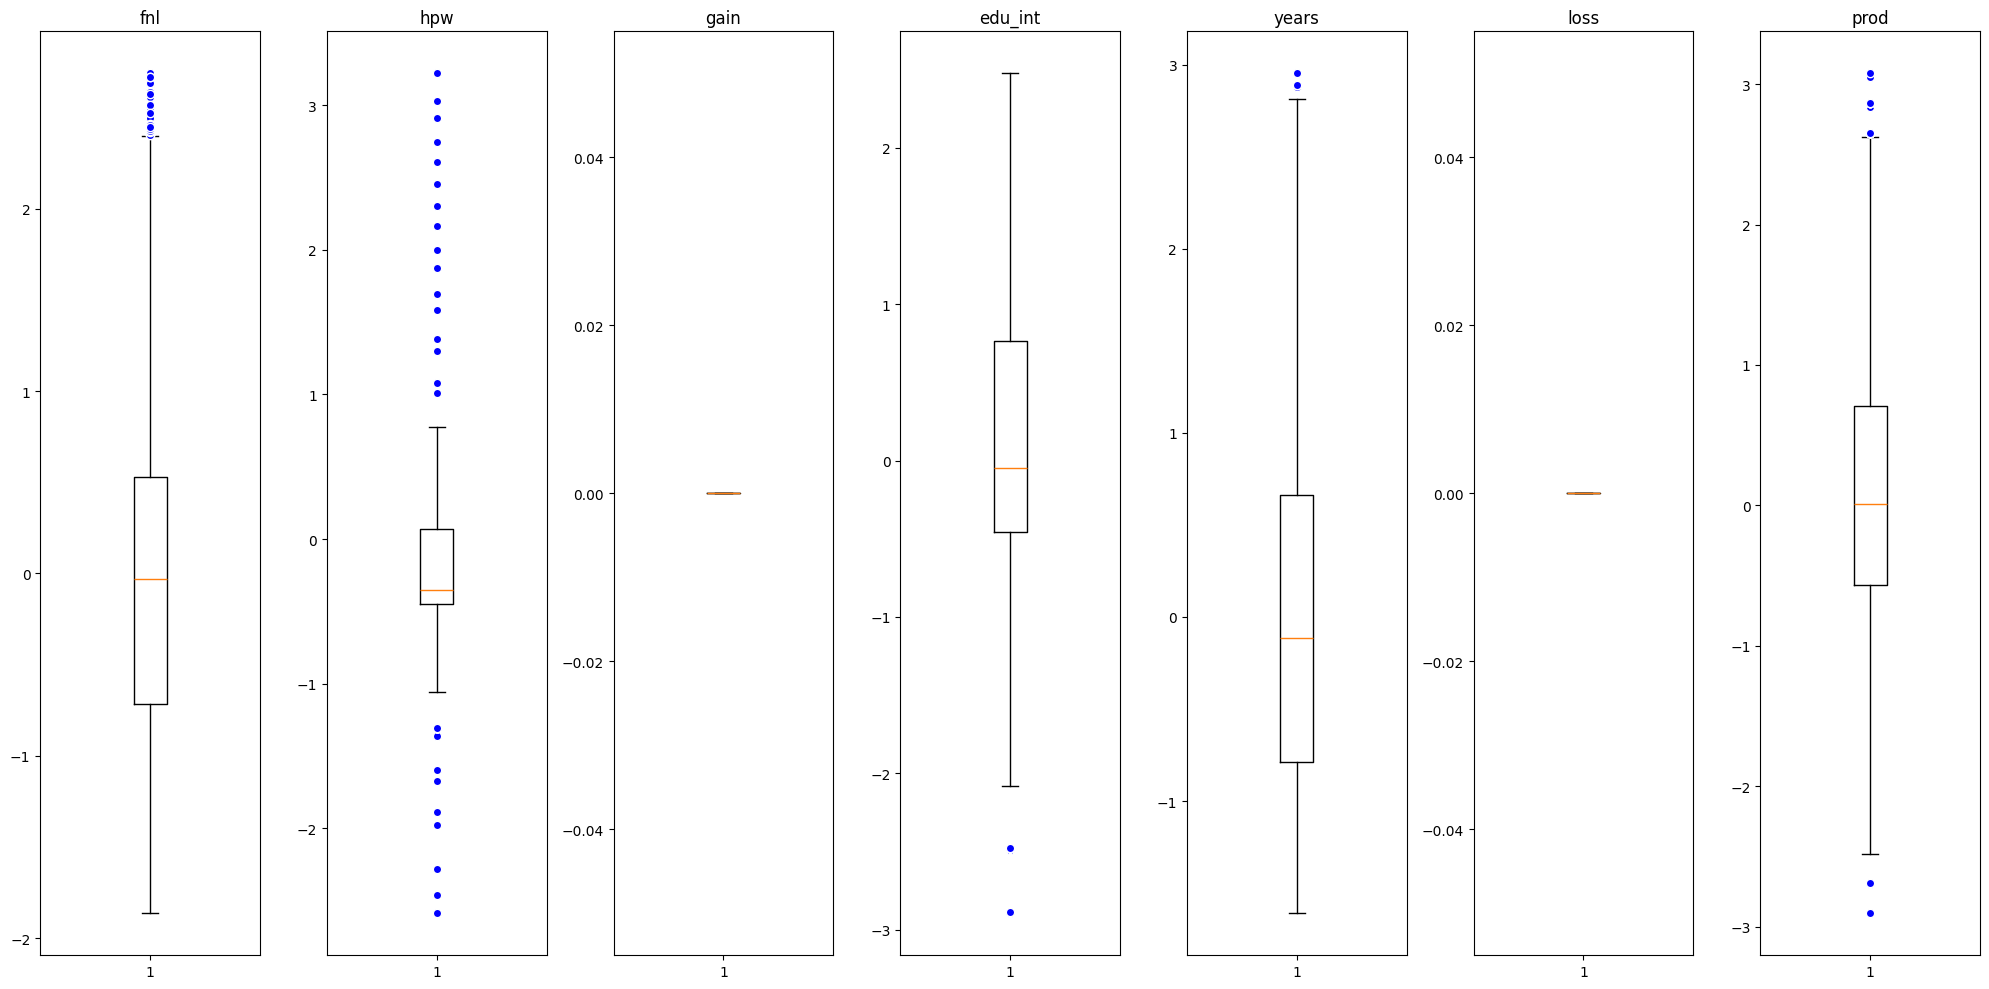

In [462]:
sp_df = pd.concat([sp_train_df, sp_test_df], axis=0, ignore_index=True)
sp_df.info()

circle = dict(markerfacecolor='b', marker='o', markeredgecolor='w')
print_numeric_boxplots(sp_df, circle)

# 5. Algoritmi de invatare automata

### 5.1. Arbori de decizie

#### 5.1.1. Folosind biblioteca scikit-learn

Pentru dataset-ul "credit_risk":

              precision    recall  f1-score   support

    Approved       0.91      0.97      0.94      1564
    Declined       0.84      0.66      0.74       436

    accuracy                           0.90      2000
   macro avg       0.88      0.81      0.84      2000
weighted avg       0.90      0.90      0.89      2000



<Axes: >

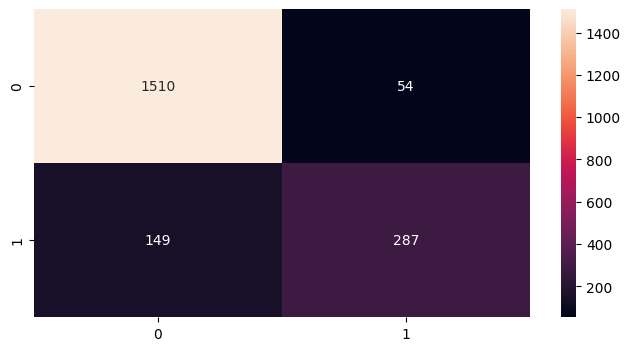

In [463]:
cr_X_train = cr_train_df.drop(columns=['loan_approval_status'])
cr_y_train = cr_train_df['loan_approval_status']

cr_X_test = cr_test_df.drop(columns=['loan_approval_status'])
cr_y_test = cr_test_df['loan_approval_status']

categorical_columns = cr_X_train.select_dtypes(exclude=['number']).columns

ordinal_encoder = OrdinalEncoder()
cr_X_train[categorical_columns] = ordinal_encoder.fit_transform(cr_X_train[categorical_columns])
cr_X_test[categorical_columns] = ordinal_encoder.transform(cr_X_test[categorical_columns])

cr_dtc = DecisionTreeClassifier(
    max_depth=100,
    min_samples_leaf=20,
    criterion='entropy',
    random_state=0,
    ccp_alpha=0.0001)

cr_dtc.fit(cr_X_train, cr_y_train)
cr_y_pred = cr_dtc.predict(cr_X_test)

print(classification_report(cr_y_test, cr_y_pred))
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(cr_y_test, cr_y_pred), annot=True, fmt='d')

Pentru dataset-ul "SalaryPrediction":

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      1513
        >50K       0.70      0.52      0.59       487

    accuracy                           0.83      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.82      0.83      0.82      2000



<Axes: >

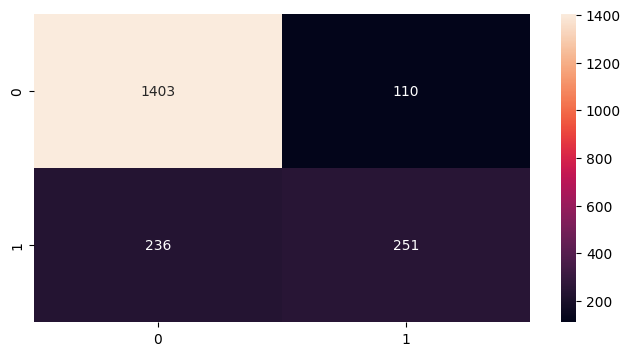

In [464]:
sp_X_train = sp_train_df.drop(columns=['money'])
sp_y_train = sp_train_df['money']

sp_X_test = sp_test_df.drop(columns=['money'])
sp_y_test = sp_test_df['money']

categorical_columns = sp_X_train.select_dtypes(exclude=['number']).columns

ordinal_encoder = OrdinalEncoder()
sp_X_train[categorical_columns] = ordinal_encoder.fit_transform(sp_X_train[categorical_columns])
sp_X_test[categorical_columns] = ordinal_encoder.fit_transform(sp_X_test[categorical_columns])

sp_dtc = DecisionTreeClassifier(
    max_depth=40,
    min_samples_leaf=20,
    criterion='entropy',
    random_state=0,
    ccp_alpha=0.0001)

sp_dtc.fit(sp_X_train, sp_y_train)

sp_y_pred = sp_dtc.predict(sp_X_test)

print(classification_report(sp_y_test, sp_y_pred))
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(sp_y_test, sp_y_pred), annot=True, fmt='d')


#### 5.1.2. Implementare bazata pe codul din laborator

In [465]:

from copy import deepcopy
from graphviz import Digraph


class DecisionTreeNode:   
    def __init__(self, 
                 feature = None, 
                 children = None, 
                 label = None):
       
        self.split_feature = feature 
        self.children = children if (children is not None and feature is not None) else {}
        self.label = label
        self.depth = 1
        self.score = 0
        self.num_samples = 0
    
class DecisionTree:
    def __init__(self,
                 max_depth: int = np.inf,
                 min_samples_per_node: int = 1):
        
        self._root: DecisionTreeNode | None = None
        self._max_depth: int = max_depth
        self._min_samples_per_node: int = min_samples_per_node
        
        
    @staticmethod
    def most_frequent_class(y: pd.Series) -> str:
        return y.mode()[0]
    
    
    @staticmethod
    def compute_entropy(y: pd.Series) -> float:
        class_counts = y.value_counts(normalize=True)
        entropy = -np.sum(class_counts * np.log2(class_counts))

        return entropy
        
    
    @staticmethod
    def compute_information_gain(X: pd.DataFrame, y: pd.Series, feature: str) -> float:
        initial_entropy = DecisionTree.compute_entropy(y)
        final_entropy = 0

        for value in X[feature].unique():
            subset = y[X[feature] == value]
            subset_entropy = DecisionTree.compute_entropy(subset)
            subset_weight = sum(X[feature] == value) / len(X)

            final_entropy += subset_entropy * subset_weight
        
        gain = initial_entropy - final_entropy

        return gain    
    
    def _select_best_split_feature(self, X: pd.DataFrame, y: pd.Series, attribute_list: list[str]) -> str:
        gains = {feature: DecisionTree.compute_information_gain(X, y, feature) for feature in attribute_list}
        return max(gains, key=gains.get) if gains else None
    
    
    def _generate_tree(self,
                       parent_node: DecisionTreeNode | None,
                       X: pd.DataFrame,
                       y: pd.Series,
                       feature_list: list[str],
                       select_feature_func):
        
        feature_list = deepcopy(feature_list)
        
        node = DecisionTreeNode()
        node.depth = parent_node.depth + 1 if parent_node is not None else 0
        node.score = DecisionTree.compute_entropy(y)  
        node.num_samples = len(y)
        node.label = DecisionTree.most_frequent_class(y)

        if not feature_list or node.depth == self._max_depth or node.num_samples < self._min_samples_per_node or y.nunique() == 1:
            return node

        split_feature = select_feature_func(X, y, feature_list)
        feature_list.remove(split_feature)
        node.split_feature = split_feature

        for value in X[split_feature].unique():
            subset_X = X[X[split_feature] == value]
            subset_y = y[X[split_feature] == value]
            node.children[value] = self._generate_tree(node, subset_X, subset_y, feature_list, select_feature_func)
        
        return node
    
        
    def fit(self, X: pd.DataFrame, y: pd.Series):
        select_feature_func = self._select_best_split_feature
        
        self._root = self._generate_tree(parent_node=None,
                                         X=X,
                                         y=y,
                                         feature_list=X.columns.tolist(),
                                         select_feature_func=select_feature_func)
        
    def _predict_once(self, x: pd.Series) -> str:
        node = self._root
        
        while node.split_feature is not None:
            if node.split_feature in x and x[node.split_feature] in node.children:
                node = node.children[x[node.split_feature]]
            else:
                break
        return node.label
        
    def predict(self, X: pd.DataFrame) -> np.ndarray:
        return np.array([self._predict_once(x) for _, x in X.iterrows()])
    
    def get_depth(self):
        def _get_depth(node: DecisionTreeNode) -> int:
            if node is None:
                return 0
            return max([_get_depth(child) for child in node.children.values()], default=0) + 1
        
        return _get_depth(self._root)
    
    def get_number_of_nodes(self):
        def _get_number_of_nodes(node: DecisionTreeNode) -> int:
            if node is None:
                return 0
            return sum([_get_number_of_nodes(child) for child in node.children.values()], 0) + 1
        
        return _get_number_of_nodes(self._root)
    
    def get_tree_graph(self):
        return self._root.get_tree_graph()
    
    def display(self):
        return self._root.display()

              precision    recall  f1-score   support

    Approved       0.78      1.00      0.88      1564
    Declined       0.00      0.00      0.00       436

    accuracy                           0.78      2000
   macro avg       0.39      0.50      0.44      2000
weighted avg       0.61      0.78      0.69      2000



<Axes: >

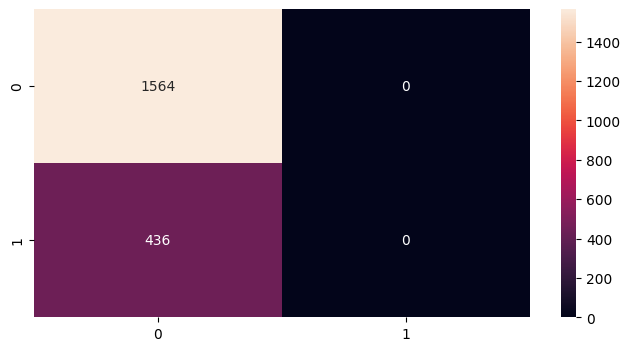

In [466]:
cr_id3_dtc = DecisionTree(max_depth=100, min_samples_per_node=80)

cr_id3_dtc.fit(cr_X_train, cr_y_train)
cr_id3_y_pred = cr_id3_dtc.predict(cr_X_test)

print(classification_report(cr_y_test, cr_id3_y_pred, zero_division=0))
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(cr_y_test, cr_id3_y_pred), annot=True, fmt='d')

.....

### 5.2. Multi-Layered Perceptron

#### 5.2.1. Folosind biblioteca scikit-learn

Pentru dataset-ul "credit_risk":

              precision    recall  f1-score   support

    Approved       0.89      0.98      0.93      1564
    Declined       0.89      0.55      0.68       436

    accuracy                           0.89      2000
   macro avg       0.89      0.77      0.81      2000
weighted avg       0.89      0.89      0.88      2000



<Axes: >

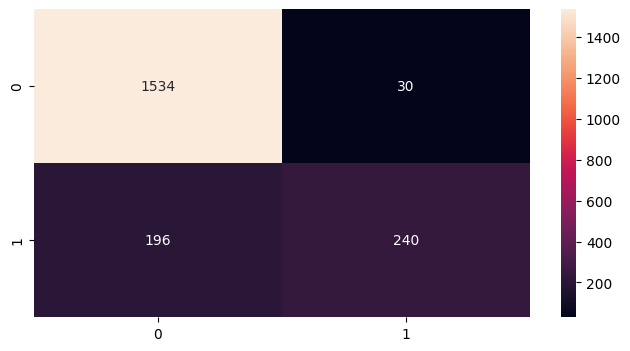

In [467]:
cr_mlp = MLPClassifier(
    hidden_layer_sizes=(100, 150),
    activation='relu',
    solver='adam',
    alpha=0.0008,
    learning_rate_init=0.04,
    max_iter=5000,
    batch_size=100,
    early_stopping=True,
    random_state=0
)

cr_mlp.fit(cr_X_train, cr_y_train)

cr_y_pred = cr_mlp.predict(cr_X_test)

print(classification_report(cr_y_test, cr_y_pred))
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(cr_y_test, cr_y_pred), annot=True, fmt='d')

Pentru dataset-ul "SalaryPrediction":

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89      1513
        >50K       0.66      0.59      0.63       487

    accuracy                           0.83      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.82      0.83      0.82      2000



<Axes: >

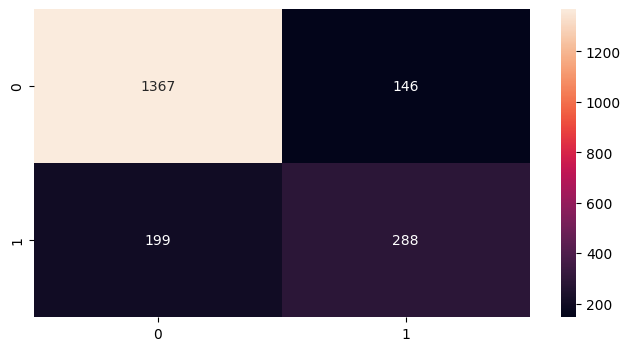

In [468]:
sp_mlp = MLPClassifier(
    hidden_layer_sizes=(784, 128),
    activation='relu',
    solver='adam',
    alpha=0.0004,
    learning_rate_init=0.005,
    max_iter=20,
    batch_size=128,
    early_stopping=True,
    random_state=0
)

sp_mlp.fit(sp_X_train, sp_y_train)

sp_y_pred = sp_mlp.predict(sp_X_test)

print(classification_report(sp_y_test, sp_y_pred))
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(sp_y_test, sp_y_pred), annot=True, fmt='d')


#### 5.2.2. Implementare bazata pe codul din laborator

In [469]:
from typing import List


class Layer:

    def forward(self, x: np.ndarray) -> np.ndarray:
        raise NotImplementedError
        
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        raise NotImplementedError
        
    def update(self, *args, **kwargs):
        pass  # If a layer has no parameters, then this function does nothing


class FeedForwardNetwork:
    
    def __init__(self, layers: List[Layer]):
        self.layers = layers
        
    def forward(self, x: np.ndarray, train: bool = True) -> np.ndarray:
        self._inputs = []
        for layer in self.layers:
            if train:
                self._inputs.append(x)
            x = layer.forward(x)
        return x
    
    def backward(self, dy: np.ndarray) -> np.ndarray:
        for input, layer in zip(reversed(self._inputs), reversed(self.layers)):
            dy = layer.backward(input, dy)

        return dy
    
    def update(self, *args, **kwargs):
        for layer in self.layers:
            layer.update(*args, **kwargs)

    def predict(self, x: np.ndarray) -> np.ndarray:
        return self.forward(x, train=False)



class Linear(Layer):
    
    def __init__(self, insize: int, outsize: int) -> None:
        bound = np.sqrt(6. / insize)
        self.weight = np.random.uniform(-bound, bound, (insize, outsize))
        self.bias = np.zeros((outsize,))
        
        self.dweight = np.zeros_like(self.weight)
        self.dbias = np.zeros_like(self.bias)
   
    def forward(self, x: np.ndarray) -> np.ndarray:
        # <1>: calculați ieșirea unui strat liniar
        # x - este o matrice numpy B x M, unde 
        #    B - dimensiunea batchului, 
        #    M - dimensiunea caracteristicilor de intrare (insize)
        # Sugestie: folosiți înmulțirea matricială numpy pentru a implementa propagarea înainte într-o singură trecere
        # pentru toate exemplele din batch
        
        return np.dot(x, self.weight) + self.bias
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        # <2> : calculați dweight, dbias și returnați dx
        # x - este o matrice numpy B x M, unde 
        #     B - dimensiunea batchului, 
        #     M - dimensiunea caracteristicilor (features) de intrare (insize)
        # dy - este o matrice numpy B x N, unde 
        #     B - dimensiunea batchului, 
        #     N - dimensiunea caracteristicilor (features) de ieșire (outsize)
        # Sugestie: folosiți înmulțirea matricială numpy pentru a implementa propagarea înapoi într-o singură trecere 
        #       pentru self.dweight
        # Sugestie: folosiți numpy.sum pentru a implementa propagarea înapoi într-o singură trecere pentru self.dbias

        self.dweight = np.dot(x.T, dy)
        self.dbias = np.sum(dy, axis=0)
        return np.dot(dy, self.weight.T)
    
    def update(self, mode='SGD', lr=0.001, mu=0.9):
        if mode == 'SGD':
            self.weight -= lr * self.dweight
            self.bias -= lr * self.dbias
        else:
            raise ValueError('mode should be SGD, not ' + str(mode))
        


class ReLU(Layer):
    
    def __init__(self) -> None:
        pass
    
    def forward(self, x: np.ndarray) -> np.ndarray:
        # <3> : Calculați ieșirea unei unități liniare rectificate
        return np.maximum(x, 0)
    
    def backward(self, x: np.ndarray, dy: np.ndarray) -> np.ndarray:
        # <4> : Calculați gradientul față de x
        # x - este o matrice numpy B x M, unde B - dimensiunea batchului, M - dimensiunea caracteristicilor
        # Sugestie: utilizați indexarea logică numpy pentru a determina unde intrarea (x) este negativă
        #       și faceți gradientul 0 pentru acele exemple
        return (x > 0) * dy
    


class CrossEntropy:
    
    def __init__(self):
        pass
    
    def softmax(self, x):
        exps = np.exp(x)
        return exps / np.sum(exps,axis = 1).reshape(-1,1)

    def forward(self, y: np.ndarray, t: np.ndarray) -> float:
        # <5> : Calculați probabilitatea logaritmică negativă
        # y - matrice numpy (B, K), unde B - dimensiunea batch-ului, K - numărul de clase (numărul de logaritmi)
        # t - vector numpy (B, ), unde B - dimensiunea batch-ului, care indică clasa corectă
        # Pasi: 
        #   - folositi softmax() pe intrari pentru a transforma logits (y) in probabilitati
        #   - selectati probabilitatile care corespund clasei reale (t)
        #   - calculati -log() peste probabilitati
        #   - impartiti la batch size pentru a calcula valoarea medie peste toate exemplele din batch

        dy = self.softmax(y)
        dy = -np.log(dy[np.arange(len(dy)), t])
        return np.mean(dy)
    
    def backward(self, y: np.ndarray, t: np.ndarray) -> np.ndarray:
        # <6> : Calculati dl/dy
        # Pasi: 
        #   - calculati softmax(y) pentru a determina probabilitatea ca fiecare element sa apartina clasei i
        #   - ajustati gradientii pentru clasa corecta: aplicati scaderea dL/dy_i = pi - delta_ti conform formulelor de mai sus
        #   - impartiti la batch size pentru a calcula valoarea medie peste toate exemplele din batch

        dy = self.softmax(y)
        delta = np.zeros_like(dy)
        delta[np.arange(len(dy)), t] = 1
        return (dy - delta) / len(dy)


In [488]:
def accuracy(y: np.ndarray, t: np.ndarray) -> float:
    # <7> : Calculati acuratetea
    # Pasi: 
    # - folosiți np.argmax() pentru a afla predictiile retelei
    # - folositi np.sum() pentru a numara cate sunt corecte comparand cu ground truth (t)
    # - impartiti la batch size pentru a calcula valoarea medie peste toate exemplele din batch
    return np.sum(np.argmax(y, 1) == t) / len(t)


In [471]:
label_encoder = preprocessing.LabelEncoder()
sp_y_train = label_encoder.fit_transform(sp_y_train)
sp_y_test = label_encoder.transform(sp_y_test)

              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      1513
        >50K       0.70      0.35      0.47       487

    accuracy                           0.81      2000
   macro avg       0.76      0.65      0.67      2000
weighted avg       0.79      0.81      0.78      2000



<Axes: >

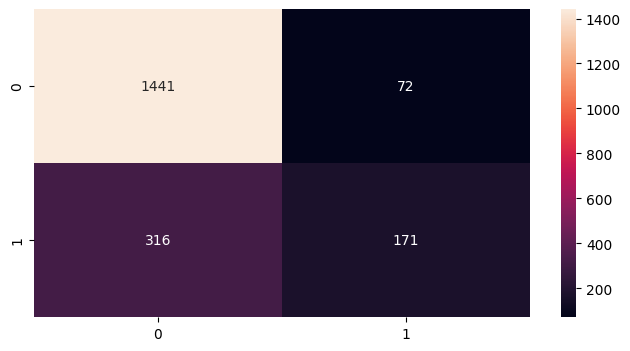

In [491]:
def train(sp_X_train, sp_y_train, epochs=20, batch_size=128, learning_rate=0.005):
    # Initialize the layers of the network
    layers = [
        Linear(sp_X_train.shape[1], 100),  # Input to first hidden layer
    ]

    for _ in range(10):
        layers.append(ReLU())
        layers.append(Linear(100, 100))

    layers.append(ReLU())
    layers.append(Linear(100, 2))
    

    network = FeedForwardNetwork(layers)
    loss_function = CrossEntropy()

    for _ in range(epochs):
        for idx in range(0, len(sp_X_train), batch_size):
            x = sp_X_train[idx:idx + batch_size]
            t = sp_y_train[idx:idx + batch_size]

            # Forward pass
            y = network.forward(x)

            # Backward pass
            dy = loss_function.backward(y, t)
            network.backward(dy)

            # Update weights
            network.update(lr=learning_rate)

    return network

    
trained_network = train(sp_X_train, sp_y_train)


def softmax(x: np.ndarray) -> np.ndarray:
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))  # For numerical stability
    return exps / np.sum(exps, axis=1, keepdims=True)

def predict(network: FeedForwardNetwork, X: np.ndarray) -> np.ndarray:
    logits = network.forward(X, train=False)
    probabilities = softmax(logits)
    predictions = np.argmax(probabilities, axis=1)
    return predictions

predictions = predict(trained_network, sp_X_test)
predictions = label_encoder.inverse_transform(predictions)

print(classification_report(sp_y_test, predictions))
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(sp_y_test, predictions), annot=True, fmt='d')  



Curbele de train si test: